In [24]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [25]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [26]:
#load data
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

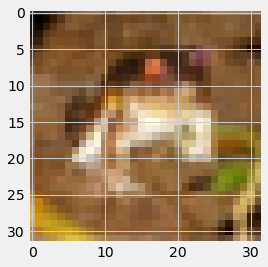

In [27]:
#show image 
index =0
img = plt.imshow(x_train[index])

In [28]:
#convert class names to vector format
y_train_class = to_categorical(y_train)
y_test_class = to_categorical(y_test)


In [29]:
#prrprocess image data : normalize value 

x_train = x_train / 255
x_test = x_test / 255

In [75]:
#define model
model = Sequential()
#1st convolution-pooling layers
model.add(Conv2D(32,(5,5), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))
#2nd convolution-pooling layers
model.add(Conv2D(32,(5,5), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32,(5,5), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32,(5,5), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32,(5,5), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))



#adding fully connected network using Flattening layer
model.add(Flatten())
#model.add(Dense(1000,activation = 'relu'))
#model.add(Dropout(0.5))

model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(250,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(100,activation = 'relu'))

#10 neuron for 10 class
model.add(Dense(10, activation = 'softmax'))


In [76]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train the model
hist = model.fit(x_train, y_train_class, batch_size = 64, epochs= 50, validation_data = (x_test, y_test_class))

#evaluate model
_, test_acc = model.evaluate(x_test, y_test_class)

Epoch 1/50
782/782 [==============================] - 5s 7ms/step - loss: 1.7813 - accuracy: 0.3096 - val_loss: 1.5391 - val_accuracy: 0.4320
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.3699 - accuracy: 0.4982 - val_loss: 1.3214 - val_accuracy: 0.5264
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1840 - accuracy: 0.5739 - val_loss: 1.1278 - val_accuracy: 0.6052
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 1.0580 - accuracy: 0.6258 - val_loss: 1.0528 - val_accuracy: 0.6253
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.9670 - accuracy: 0.6622 - val_loss: 1.0207 - val_accuracy: 0.6395
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8986 - accuracy: 0.6862 - val_loss: 1.0494 - val_accuracy: 0.6476
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8423 - accuracy: 0.7071 - val_loss: 0.9936 - val_accuracy: 0.6562
Epoch 

In [77]:
print('Test Accuracy = ', test_acc * 100, '%')

Test Accuracy =  68.44000220298767 %


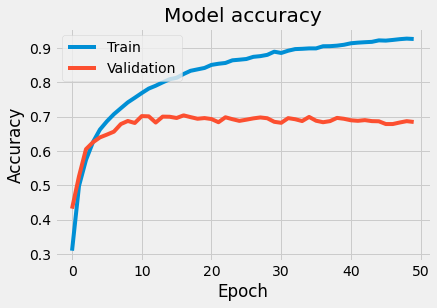

In [78]:
#plot trainning accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

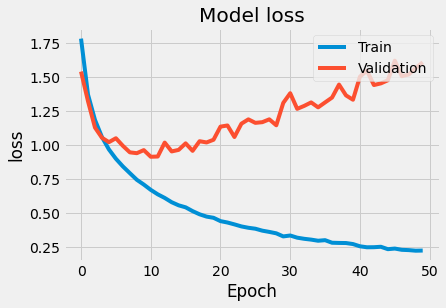

In [79]:
#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()

In [105]:
#test the model
from google.colab import files
upload = files.upload()

Saving Truck_4.jpg to Truck_4.jpg


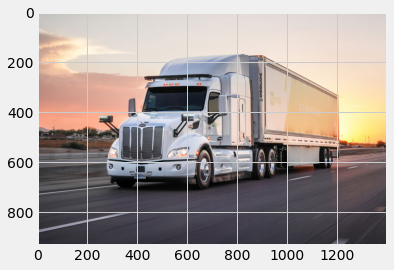

In [106]:
new_img = plt.imread('Truck_4.jpg')
img = plt.imshow(new_img)

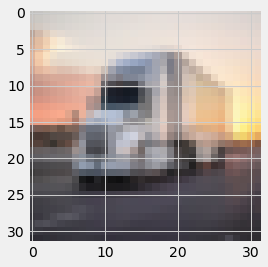

In [107]:
#resize the testing image
from skimage.transform import resize
resized_img = resize(new_img,(32,32,3))
img = plt.imshow(resized_img)

In [108]:
#get predicted value
pred = model.predict(np.array([resized_img]))

In [109]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [110]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = pred
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

print(classes[list_index[0]], ':', round(pred[0][list_index[0]] * 100), '%')

[9, 8, 1, 0, 3, 2, 5, 4, 7, 6]
truck : 100.0 %
